<a href="https://colab.research.google.com/github/FiorellaZarza96/proyecto_integrado_2/blob/main/Educacion_argentina_ypynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armar dataframe de al menos 100 filascon datos random con apellido y nombre, numero de dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota primer trimestre, nota segundo trimestre, nota tercer trimestre, faltas a clases. con bordes

import pandas as pd
import numpy as np
import random

# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Crear una lista de nombres y apellidos (puedes ampliarla)
nombres = ["Juan", "María", "Pedro", "Ana", "Carlos", "Laura", "Diego", "Sofia", "Luis", "Valentina"]
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Sánchez", "Romero", "Gómez"]


# Crear una lista de DNIs (puedes ajustar el rango)
dnis = list(range(10000000, 10100000))

# Crear un DataFrame con 100 filas
df = pd.DataFrame({
    "Apellido": [random.choice(apellidos) for _ in range(100)],
    "Nombre": [random.choice(nombres) for _ in range(100)],
    "DNI": [random.choice(dnis) for _ in range(100)],
    "Materia Escolar": [random.choice(materias) for _ in range(100)],
    "Nota Primer Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Nota Segundo Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Nota Tercer Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Faltas a Clases": [random.randint(0, 15) for _ in range(100)]
})


# Puedes imprimir el DataFrame con bordes
from IPython.display import display, HTML

display(HTML(df.to_html(index=False)))

Apellido,Nombre,DNI,Materia Escolar,Nota Primer Trimestre,Nota Segundo Trimestre,Nota Tercer Trimestre,Faltas a Clases
Martínez,María,10065733,Biología,2,5,6,7
Rodríguez,Ana,10002369,Educación Física,5,9,1,0
Sánchez,Ana,10066485,Sociología,2,5,10,8
González,Carlos,10097431,Geografía,8,2,4,15
López,Laura,10035214,Inglés,3,2,5,10
Gómez,María,10050197,Ciencias Naturales,7,2,6,5
Fernández,Diego,10048135,Arte,6,4,5,3
Martínez,Sofia,10031160,Lengua y Literatura,6,9,8,11
Sánchez,Pedro,10065341,Música,2,1,3,13
Sánchez,Ana,10072639,Arte,5,6,4,4


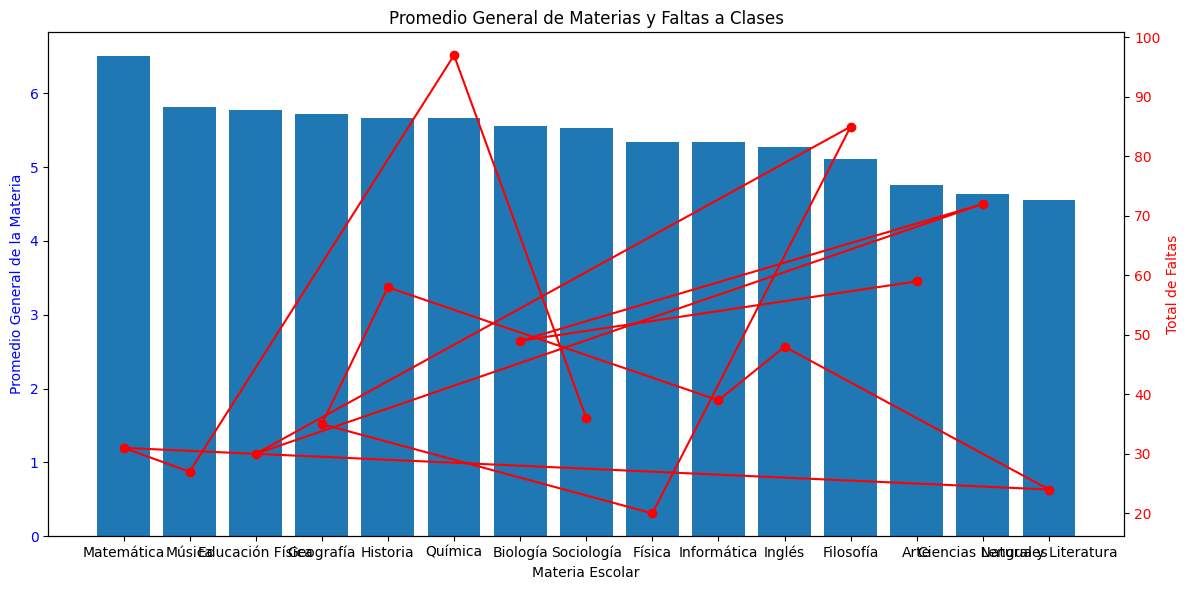

In [4]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display, HTML


# Lista de materias escolares argentinas de nivel secundario
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Crear una lista de nombres y apellidos (puedes ampliarla)
nombres = ["Juan", "María", "Pedro", "Ana", "Carlos", "Laura", "Diego", "Sofia", "Luis", "Valentina"]
apellidos = ["García", "Rodríguez", "González", "Fernández", "López", "Martínez", "Pérez", "Sánchez", "Romero", "Gómez"]


# Crear una lista de DNIs (puedes ajustar el rango)
dnis = list(range(10000000, 10100000))

# Crear un DataFrame con 100 filas
df = pd.DataFrame({
    "Apellido": [random.choice(apellidos) for _ in range(100)],
    "Nombre": [random.choice(nombres) for _ in range(100)],
    "DNI": [random.choice(dnis) for _ in range(100)],
    "Materia Escolar": [random.choice(materias) for _ in range(100)],
    "Nota Primer Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Nota Segundo Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Nota Tercer Trimestre": [random.randint(1, 10) for _ in range(100)],
    "Faltas a Clases": [random.randint(0, 15) for _ in range(100)]
})

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby("Materia Escolar")[["Nota Primer Trimestre", "Nota Segundo Trimestre", "Nota Tercer Trimestre"]].mean().mean(axis=1)

# Ordenar de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular la cantidad de faltas por materia
faltas_por_materia = df.groupby("Materia Escolar")["Faltas a Clases"].sum()


# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras para el promedio de cada materia
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)
ax1.set_ylabel("Promedio General de la Materia", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xlabel("Materia Escolar")
ax1.set_title("Promedio General de Materias y Faltas a Clases")

# Segundo eje para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color="red", marker="o")
ax2.set_ylabel("Total de Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha="right")

# Ajustar el espacio entre las barras y las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()
